In [1]:
import numpy as np
import pandas as pd


In [2]:
data =pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data = data.drop(['RowNumber','CustomerId','Surname'], axis = 1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data = pd.get_dummies(data, columns = ['Geography'])


In [8]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
data['Gender'] = l.fit_transform(data['Gender'])


In [12]:
X = data.iloc[:,:]
X = X.drop(['Exited'], axis = 1)
y = data.iloc[:,9]

In [13]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


<AxesSubplot:>

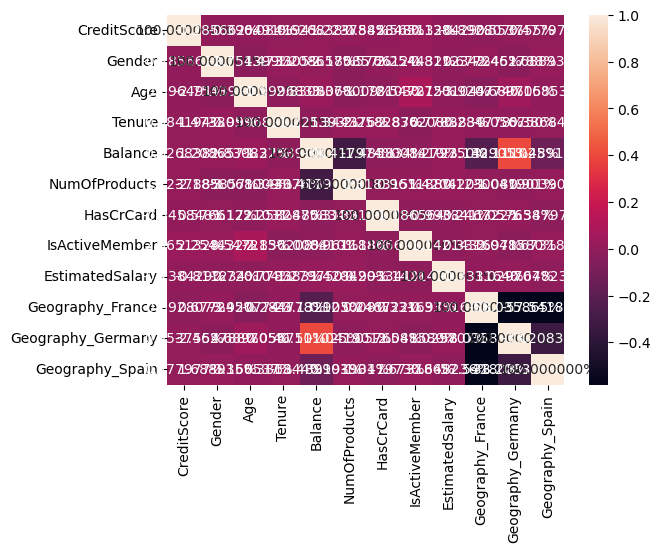

In [14]:
import seaborn as sns
sns.heatmap(X.corr() , annot = True, fmt = '%')


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 11 )

In [47]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
sc.fit_transform(X_train,Y_train)
sc.fit_transform(X_test, Y_test)


array([[-1.31935936,  0.91647499, -0.76526426, ..., -0.99401789,
         1.71377008, -0.57581067],
       [-0.55323031,  0.91647499, -0.39029556, ...,  1.00601811,
        -0.58350885, -0.57581067],
       [-1.14910846,  0.91647499,  2.60945412, ...,  1.00601811,
        -0.58350885, -0.57581067],
       ...,
       [ 0.84069895,  0.91647499, -0.95274862, ..., -0.99401789,
         1.71377008, -0.57581067],
       [ 0.11713262, -1.09113725,  0.17215751, ..., -0.99401789,
        -0.58350885,  1.73668197],
       [ 2.1282214 ,  0.91647499, -0.95274862, ...,  1.00601811,
        -0.58350885, -0.57581067]])

In [48]:
Y_train

4199    0
757     0
4001    1
8163    1
4250    0
       ..
1293    0
4023    0
7259    0
5200    0
3775    0
Name: Exited, Length: 8000, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
log =  LogisticRegression()
log.fit(X_train, Y_train)
log.predict(X_test)
log.score(X_test,Y_test)

0.7935

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10)
forest.fit(X_train, Y_train)
forest.predict(X_test)
forest.score(X_test,Y_test)

0.864

In [67]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(X_train, Y_train)
tree.predict(X_test)
tree.score(X_test,Y_test)

0.796

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb.predict(X_test)
nb.score(X_test,Y_test)

0.7905

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
knn.predict(X_test)
knn.score(X_test,Y_test)

C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.764

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test,knn.predict(X_test) ))
print(classification_report(Y_test,knn.predict(X_test)))

[[1498  104]
 [ 368   30]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1602
           1       0.22      0.08      0.11       398

    accuracy                           0.76      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.69      0.76      0.71      2000



C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [55]:
confusion_matrix(Y_test,log.predict(X_test) )
print(classification_report(Y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1602
           1       0.40      0.07      0.12       398

    accuracy                           0.79      2000
   macro avg       0.60      0.52      0.50      2000
weighted avg       0.73      0.79      0.73      2000



In [43]:
print(classification_report(Y_test,tree.predict(X_test)))
confusion_matrix(Y_test,tree.predict(X_test) )

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1602
           1       0.50      0.56      0.53       398

    accuracy                           0.80      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.81      0.80      0.81      2000



array([[1381,  221],
       [ 174,  224]], dtype=int64)

In [44]:
print(classification_report(Y_test,forest.predict(X_test)))
confusion_matrix(Y_test,forest.predict(X_test) )

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1602
           1       0.73      0.44      0.55       398

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



array([[1537,   65],
       [ 222,  176]], dtype=int64)

In [45]:
print(classification_report(Y_test,nb.predict(X_test)))
confusion_matrix(Y_test,nb.predict(X_test) )

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1602
           1       0.39      0.09      0.15       398

    accuracy                           0.79      2000
   macro avg       0.60      0.53      0.52      2000
weighted avg       0.73      0.79      0.74      2000



array([[1544,   58],
       [ 361,   37]], dtype=int64)

In [ ]:
import tensorflow as tf
